# Charts

In [1]:
import pandas as pd

In [2]:
df = pd.read_json("measurements.json", convert_dates=["timestamp"])
df["full_name"] = df["name"] + " " + df["version"]

df2 = df[["full_name", "read_throughput", "write_throughput"]]
df2.set_index("full_name", inplace=True)
df2

,read_throughput,write_throughput
full_name,,
aiosqlite 0.17.0,10515.674182,224.970934
aiodbm 0.4.0,36211.703115,31328.541535


<Axes: title={'center': 'Key/value throughput in operations / second'}>

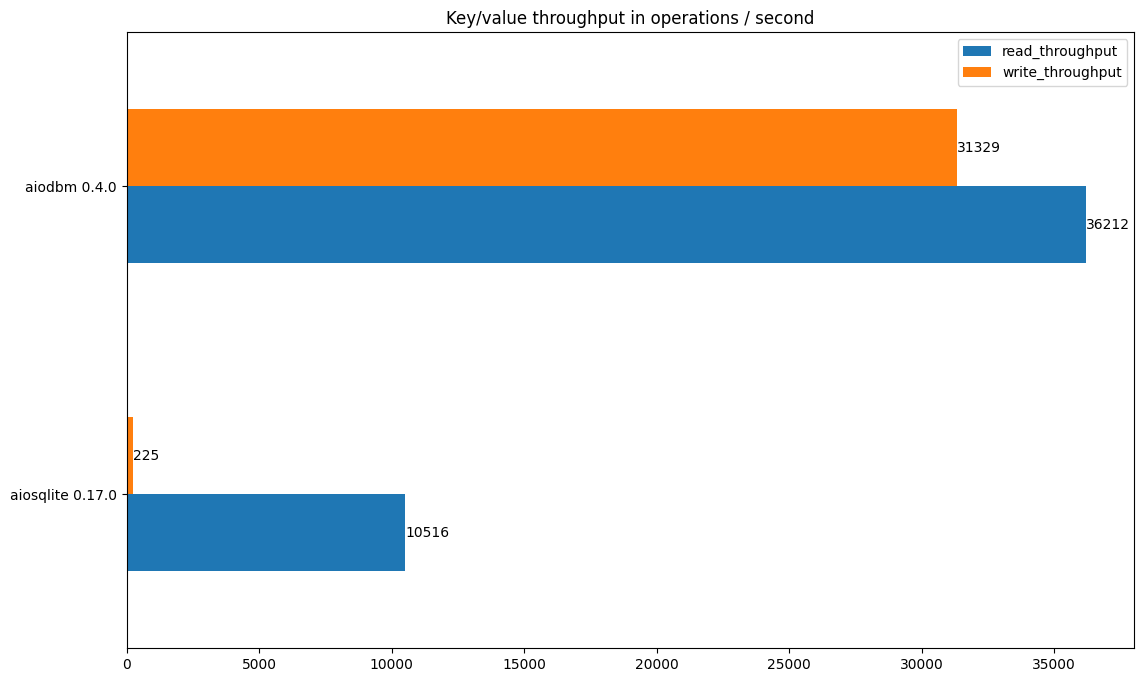

In [3]:
ax = df2.plot.barh(ylabel="", figsize=(13,8))
ax.set_title("Key/value throughput in operations / second")
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f')
ax.figure.savefig('measurements.png')
ax